In [2]:
# Calculating the Convergence statistic (R_hat)

In [ ]:
## Generating the sequences, J = 4

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(12)
numbers_0 = np.random.normal(size = 2000, scale = 0.001) 

np.random.seed(13)
numbers_1 = np.random.normal(size = 2000, scale = 0.001) 

np.random.seed(14)
numbers_2 = np.random.normal(size = 2000, scale = 0.001) 

np.random.seed(15)
numbers_3 = np.random.normal(size = 2000, scale = 0.001) 

# initial values - different 

# sample mean of chain j (M_j)
M_j = (np.sum(numbers_0)/2000) + (np.sum(numbers_1)/2000) + (np.sum(numbers_2)/2000) + (np.sum(numbers_3)/2000)

# within sample variance of chain j (V_j) 
M_0 = np.sum(numbers_0)/2000
M_1 = np.sum(numbers_1)/2000
M_2 = np.sum(numbers_2)/2000
M_3 = np.sum(numbers_3)/2000
V_j = (np.sum((numbers_0 - M_0)**2) / 2000) + (np.sum((numbers_1 - M_1)**2) / 2000) + (np.sum((numbers_2 - M_2)**2) / 2000) + (np.sum((numbers_3 - M_3)**2) / 2000)

# overall within sample variance (W)
W = (V_j)/4

# overall sample mean (M)
M = (M_j)/4

# between sample variance (B)
B = (((M_0 - M)**2) + ((M_2 - M)**2) + ((M_2 - M)**2) + ((M_3 - M)**2))/4

# convergence statistic, r_hat 
r_hat = np.sqrt((B + W)/W)

results = [M_j , V_j , W , M , B , r_hat]
results

[-0.00011026505672990792,
 4.010759781431278e-06,
 1.0026899453578195e-06,
 -2.756626418247698e-05,
 3.8808075523849585e-11,
 1.000019351794742]

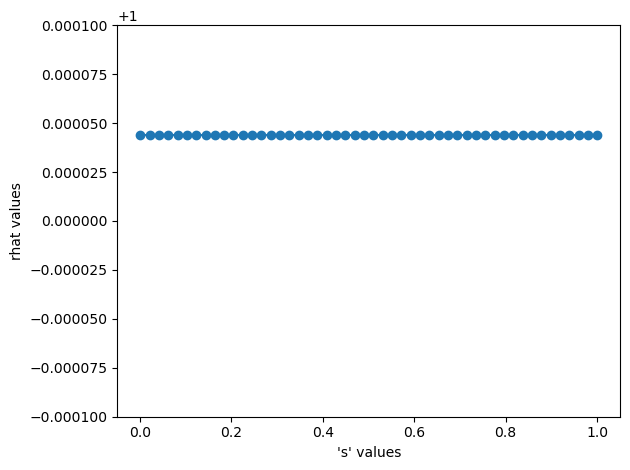

In [38]:
# 's' generator - values between 0.001 and 1
s_values = np.linspace(0.001, 1, 50) # s 

def compute_rhats(s, N=2000):
    np.random.seed(12)
    numbers_0 = np.random.normal(size = 2000, scale = s) 
    np.random.seed(13)
    numbers_1 = np.random.normal(size = 2000, scale = s) 
    np.random.seed(14)
    numbers_2 = np.random.normal(size = 2000, scale = s) 
    np.random.seed(15)
    numbers_3 = np.random.normal(size = 2000, scale = s) 
    chains = [numbers_0,numbers_1,numbers_2,numbers_3]

    M_j = [np.mean(chain) for chain in chains]
    V_j = [np.var(chain, ddof = 0) for chain in chains]
    M = np.mean(M_j)
    W = np.mean(V_j)
    B = np.mean([(mj - M)**2 for mj in M_j])
    r_hat = np.sqrt((B+W)/W)
    return r_hat

rhat_values = [compute_rhats(s) for s in s_values]

plt.plot(s_values, rhat_values, marker = 'o')
plt.ylim(0.9999, 1.0001)
plt.xlabel("'s' values")
plt.ylabel("rhat values")
plt.tight_layout()
plt.savefig("Part 1b.png")
plt.show()